# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# Создание сводной таблицы, сгруппированной по числу детей:
data_children_pivot = data.pivot_table(index=['children'], values='debt', aggfunc = {'count','sum'})

# Перименование стобцов, добавление столбца с соотношением числа имеющих задолженности к общему число заемщиков
data_children_pivot.rename(columns={'count':'total', 'sum':'debt'}, inplace=True)
data_children_pivot['ratio'] = data_children_pivot['debt'] / data_children_pivot['total']

# создание функции для определения категории заемщиков: negative - если соотношение выше среднего и positive в ином случае:
def debt_category(ratio):
    try:
        if ratio >= data_children_pivot['debt'].sum() / data_children_pivot['total'].sum():
            return 'negative'
        return 'positive'   
    except:
        pass
data_children_pivot['debt_category'] = data_children_pivot['ratio'].apply(debt_category)

data_children_pivot.sort_values('ratio',ascending=False)


,total,debt,ratio,debt_category
children,,,,
4,41,4,0.097561,negative
2,2052,194,0.094542,negative
1,4808,444,0.092346,negative
3,330,27,0.081818,negative
0,14091,1063,0.075438,positive
5,9,0,0.000000,positive


**Вывод:** 

Наблюдается следующая связь:
заемщики с детьми имеют более высокую вероятность невыплаты долга, чем заемщики без детей. Можно объяснить частыми непредвиденными семейными тратами, влекущими финансовую нестабильность. Самый высокий процент невыплат у людей, имеющих четыре ребенка.

Заемщики без детей имеют показатель ниже среднего, соответственно, реже имеют проблемы с выплатами задолженностей

Также следует отметить, что у заемщиков, имеющих 5 детей, нулевой процент невыплат. Однако это самая малочисленная группа (менее 0,05% от общего числа) и можно считать вероятность невыплаты недостаточно предсказуемой, особенно учитывая, что самый высокий процент неплательщиков - заемщики с четырьмя детьми.

Итог: заемщики без детей выплачивают кредит чаще, чем имеющие детей

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [23]:
# Создание сводной таблицы, сгруппированной по семейному положению:
data_fam_status_pivot = data.pivot_table(index=['family_status'], values='debt', aggfunc = {'count','sum'})

# Перименование стобцов, добавление столбца с соотношением числа имеющих задолженности к общему число заемщиков
data_fam_status_pivot.rename(columns={'count':'total', 'sum':'debt'}, inplace=True)
data_fam_status_pivot['ratio'] = data_fam_status_pivot['debt'] / data_fam_status_pivot['total']

# создание функции для определения категории заемщиков: negative - если соотношение выше среднего и positive в ином случае:
def debt_category(ratio):
    try:
        if ratio >= data_fam_status_pivot['debt'].sum() / data_fam_status_pivot['total'].sum():
            return 'negative'
        return 'positive'   
    except:
        pass    
data_fam_status_pivot['debt_category'] = data_fam_status_pivot['ratio'].apply(debt_category)

data_fam_status_pivot.sort_values('ratio', ascending=False)

,total,debt,ratio,debt_category
family_status,,,,
Не женат / не замужем,2796,273,0.097639,negative
гражданский брак,4134,385,0.093130,negative
женат / замужем,12261,927,0.075606,positive
в разводе,1189,84,0.070648,positive
вдовец / вдова,951,63,0.066246,positive


**Вывод:** 

Зависимость выражена в следующем:

- Не состоящие в официальном браке люди имеют самую высокую вероятность невыплаты долга (более 9%). Чаще всего это люди молодого возраста, могут быть финансово и карьерно нестабильны. Также высокий процент можно объяснить отсутствием партнера, способного разделить финансовые обязательства

- Люди, состоящие в официальном браке или имевшие такой опыт ранее, наоборот, чаще выплачивают кредиты. Женатые (замужние) заемщики могут положиться на общий, семейный бюджет.
Разведенные и овдовевшие клиенты имеют больший жизненный опыт, рассчитывают только на свои силы и более ответственны в финансовых вопросах.

Итог: заемщики, состоящие в официальном браке или имевшие такой опыт ранее, чаще выплачивают задолженности, чем неженатые (незамужние). Самый низкий процент невыплат у овдовевших клиентов.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [24]:

# Создание сводной таблицы, сгруппированной по уровню дохода:
data_income_category_pivot = data.pivot_table(index=['total_income_category'], values='debt', aggfunc = {'count','sum'})

# Перименование стобцов, добавление столбца с соотношением числа имеющих задолженности к общему число заемщиков
data_income_category_pivot.rename(columns={'count':'total', 'sum':'debt'}, inplace=True)
data_income_category_pivot['ratio'] = data_income_category_pivot['debt'] / data_income_category_pivot['total']

# создание функции для определения категории заемщиков: negative - если соотношение выше среднего и positive в ином случае:
def debt_category(ratio):
    try:
        if ratio >= data_income_category_pivot['debt'].sum() / data_income_category_pivot['total'].sum():
            return 'negative'
        return 'positive'   
    except:
        pass   
data_income_category_pivot['debt_category'] = data_income_category_pivot['ratio'].apply(debt_category)

data_income_category_pivot.sort_values('ratio',ascending=False)

,total,debt,ratio,debt_category
total_income_category,,,,
E,22,2,0.090909,negative
C,15921,1353,0.084982,negative
A,25,2,0.080000,positive
B,5014,354,0.070602,positive
D,349,21,0.060172,positive


**Вывод:** 

Самая высокая вероятность невыплаты долга у заемщиков двух категорий:

- E - заемщики с доходом менее 30.000: объясняется самым низким уровнем дохода.
- C - заемщики с доходом 50.001–200.000: самая многочисленная, активная категория. Можно предположить наличие других кредитов и траты, превышающие доходы. 


Низкая вероятность невыплаты:

- A - заемщики с доходом выше 1.000.000: немногочисленная категория, несмотря на то, что процент невыплат ниже среднего, имеют видимый отрыв от двух других "позитивных" категорий. Клиенты с высоким уровнем дохода чаще относятся к бизнесу или медиасфере, невыплаты можно объяснить нестабильностью доходов в этих сферах
- B - заемщики с доходом 200.001–1.000.000: чаще выплачивают кредиты, что обусловлено достаточно высоким уровнем дохода
- D - заемщики с доходом 30.001–50.000: самая надежная категория, в силу достаточно низкого дохода более ответственно относятся к финансам и не допускают штрафов за просрочку

Итог: самые надежные клиенты для банка: заемщики категории B и D, клиенты категории E и С чаще других допускают невыплаты. 
Однако считаю, что более релевантно провести отдельный анализ по регионам, т.к. средний доход сильно отличается от региона к региону

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [25]:

# Создание сводной таблицы, сгруппированной по цели кредита:
data_purpose_pivot = data.pivot_table(index=['purpose_category'], values='debt', aggfunc = {'count','sum'})

# Перименование стобцов, добавление столбца с соотношением числа имеющих задолженности к общему число заемщиков
data_purpose_pivot.rename(columns={'count':'total', 'sum':'debt'}, inplace=True)
data_purpose_pivot['ratio'] = data_purpose_pivot['debt'] / data_purpose_pivot['total']


# создание функции для определения категории заемщиков: negative - если соотношение выше среднего и positive в ином случае:
def debt_category(ratio):
    try:
        if ratio >= data_purpose_pivot['debt'].sum() / data_purpose_pivot['total'].sum():
            return 'negative'
        return 'positive'   
    except:
        pass    
data_purpose_pivot['debt_category'] = data_purpose_pivot['ratio'].apply(debt_category)

data_purpose_pivot.sort_values('ratio',ascending=False)

,total,debt,ratio,debt_category
purpose_category,,,,
операции с автомобилем,4279,400,0.093480,negative
получение образования,3988,369,0.092528,negative
проведение свадьбы,2313,183,0.079118,positive
операции с недвижимостью,10751,780,0.072551,positive


**Вывод:** 
Чаще не выплачиваются кредиты, оформленные с целью: 

- проведения операций с автомобилем: вероятно, заемщиками часто не учитывается появление новых расходов с появлением автомобиля
- получения образования: можно объяснить текущим низким профессиональным уровнем, следовательно, низким карьерным уровнем. Клиенты, получающие образование финансово менее стабильны.

Выплачиваются кредиты, оформленные с целью: 
- проведение свадьбы: вероятность невыплаты ниже среднего, заемщики, стремящиеся создать семью более ответственно подходят к финансовым вопросам. Также ранее сделан вывод, что клиенты, состоящие в браке, выплачивают кредит лучше, чем неженатые 
- операции с недвижимостью: самый низкий уровень невыплат. Заемщики, озадаченные жилищным вопросом, ответственно подходят к финансам. Кредиты, оформленные на операции с недвижимостью часто связаны с залогом, что дополнительно мотивирует своевременно погашать задолженности

Итог: Скорее всего, роль играет итоговая сумма кредита: очевидно, что наибольшие суммы занимаются на проведение операций с недвижимостью, их выплачивают ответственнее. Кредиты на меньшие суммы (операции с авто, образование) выплачиваются хуже.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

Пропуски были в столбцах days_employed и total_income, скорее всего связаны с тем, что клиенты не оставляли свои данные о трудовом стаже и ежемесячном доходе. Учитывая одинаковое количество пропусков (2174) и что данные в обоих столбцах относятся к трудовой деятельности, предполагаю, заполнение одного столбца связано с другим. Например, если не указать данные в days_employed, total_income останется незаполненным автоматически.

In [32]:
# Открываем исходную таблицу с необработанными пропусками:
data_with_nan = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
# Проверяем количество строк, для которых есть пропуски и в 'days_employed', и в 'total_income':
len(data_with_nan.loc[(data_with_nan['days_employed'].isna()) & (data_with_nan['total_income'].isna())])


2174

In [27]:
data_with_nan = data_with_nan.loc[(data_with_nan['days_employed'].isna()) & (data_with_nan['total_income'].isna())]
data_with_nan.groupby('income_type')['income_type'].count()

income_type
госслужащий         147
компаньон           508
пенсионер           413
предприниматель       1
сотрудник          1105
Name: income_type, dtype: int64

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Данные распределены несимметрично, т.е. в данных имеются экстремально высокие и низкие значения. В таких случаях медиана дает более реалистичную оценку центрального значения, чем среднее арифметическое, которое будет зависеть от этих экстремальных значений.

### Шаг 4: общий вывод.

Итоги по выдвинутым гипотезам:

**Зависимость от количества детей:**

клиенты без детей выплачивают кредит лучше, чем те, у которых дети есть


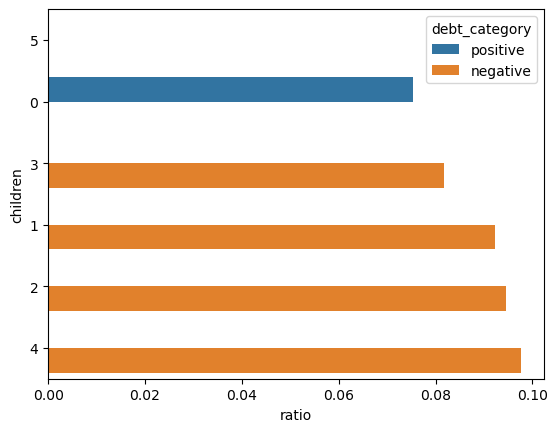

In [35]:
sns.barplot(x=data_children_pivot['ratio'], y=data_children_pivot.index, orient='h', \
             order=data_children_pivot.sort_values('ratio').index, hue=data_children_pivot['debt_category']);


**Зависимость от семейного положения:**

женатые, разведенные и овдовевшие клиенты выплачивают кредит лучше, чем заемщики не состоящие и не состоявшие в браке




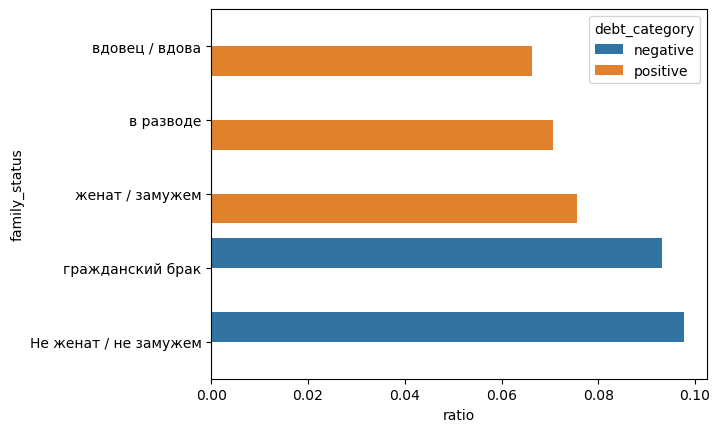

In [29]:
sns.barplot(x=data_fam_status_pivot['ratio'], y=data_fam_status_pivot.index, orient='h', \
            order=data_fam_status_pivot.sort_values('ratio').index, hue=data_fam_status_pivot['debt_category']);

**Зависимость от уровня дохода**:

самые ненадежные плательщики имеют либо низкий доход (<30.000), либо средний (50.000-200.000). Лучше всех выплачивают кредиты заемщики с высоким (>1.000.000), выше среднего (200.001–1.000.000) и ниже среднего (30.001–50.000) уровнями дохода


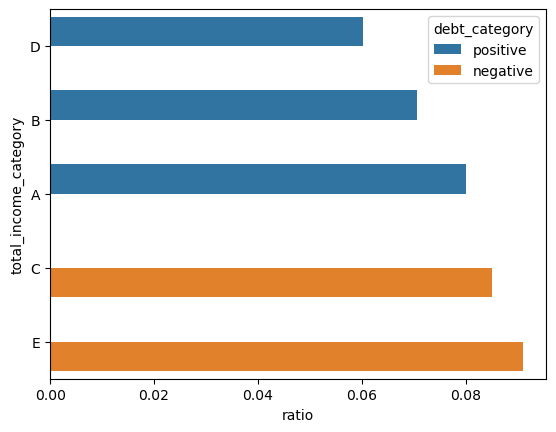

In [33]:
sns.barplot(x=data_income_category_pivot['ratio'], y=data_income_category_pivot.index, orient='h', \
            order=data_income_category_pivot.sort_values('ratio').index, hue=data_income_category_pivot['debt_category']);

**Зависимость от цели кредита:**

кредиты, оформленные на операции с недвижимостью и проведение свадьбы, выплачиваются чаще, чем кредиты на операции с автомобилем и получение образования. Есть связь с суммой кредита - чем выше сумма, тем меньше процент невыплат.



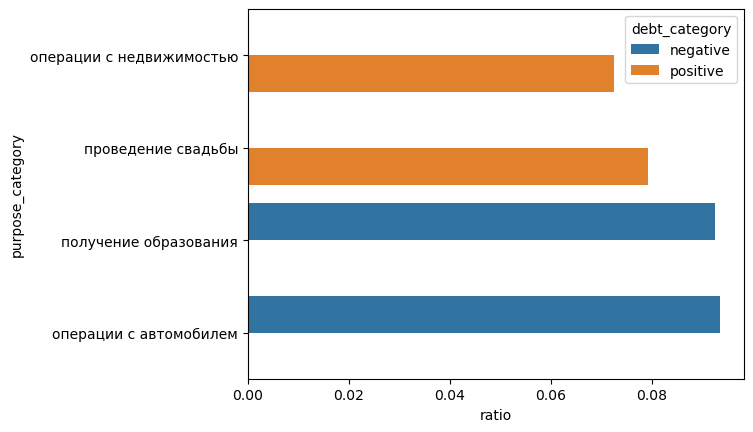

In [34]:
sns.barplot(x=data_purpose_pivot['ratio'], y=data_purpose_pivot.index, orient='h', \
            order=data_purpose_pivot.sort_values('ratio').index, hue=data_purpose_pivot['debt_category']);